
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_amarillo@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio A/B Testing Parametrico


#### Ejercicio 1:  Linea de montaje 

En una fabrica de componenetes textil se quiere comparar el tiempo de fabricacion de un determinado producto mediante tres métodos diferentes.  Se seleccionan aleatoriamente productos elaborados con cada uno de los métodos y se observa el tiempo de fabricación. 


1. ¿Se verifican los supuestos del modelo de análisis de la varianza?

2. ¿Existe evidencia de que el método influye en el tiempo medio de elaboración del producto?

3. La empresa valora que el tiempo de fabricación sea el menor posible. ¿Qué método cree que ofrece mejores resultados?

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Calcular el tamaño muestral
# -----------------------------------------------------------------------
from statsmodels.stats.power import NormalIndPower
import statsmodels.stats.api as sms


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")


# Importamos las funciones del archivo de soporte
# ------------------------------------------------------------------------------
from src import soporte_abtesting as sp


# Otros recursos
# ------------------------------------------------------------------------------
import math

# Configuración de las gráficas
# ------------------------------------------------------------------------------
# establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_style("dark")

# cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
sns.set_theme(style="dark")

# establece el estilo en seaborn-v0_8-darkgrid. 
plt.style.use('dark_background')

In [2]:
df_linea_montaje = pd.read_csv("../data/linea_montaje.csv")

In [3]:
df_linea_montaje.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


In [4]:
df_linea_montaje.shape[0]

150

In [5]:
sp.exploracion_dataframe(df_linea_montaje,"metodo")

El número de datos es 150 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
minutos,float64
metodo,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna METODO tiene las siguientes valore únicos:


,count
metodo,
A,50
B,50
C,50



 ..................... 

Los principales estadísticos de las columnas categóricas para el A son: 


,count,unique,top,freq
metodo,50,1,A,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el A son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.720512,2.102454,0.130465,3.312806,4.690071,6.005251,9.584416



 ..................... 

Los principales estadísticos de las columnas categóricas para el B son: 


,count,unique,top,freq
metodo,50,1,B,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el B son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,4.364523,2.085242,-0.818899,3.597334,4.506685,5.825817,7.668974



 ..................... 

Los principales estadísticos de las columnas categóricas para el C son: 


,count,unique,top,freq
metodo,50,1,C,50



 ..................... 

Los principales estadísticos de las columnas numéricas para el C son: 


,count,mean,std,min,25%,50%,75%,max
minutos,50.0,5.600274,2.329937,1.334696,4.071824,5.064969,6.976655,12.059491


In [6]:
df_linea_montaje["metodo"].value_counts()

metodo
A    50
B    50
C    50
Name: count, dtype: int64

,mean,std
metodo,,
A,4.7205,2.1025
B,4.3645,2.0852
C,5.6003,2.3299


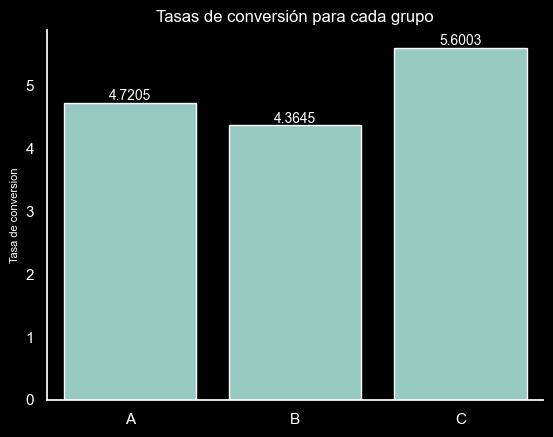

In [7]:
ratio_conversion = df_linea_montaje.groupby('metodo')['minutos'].agg(["mean", "std"]).round(4)
display(ratio_conversion)

fig = sns.barplot(ratio_conversion, 
                  x = ratio_conversion.index, 
                  y = "mean") 

# ponemos las etiquetas en cada una de las barras
fig.bar_label(fig.containers[0], fontsize=10)


# eliminar los ejes de arriba y la derecha
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

# ponemos título a la gráfica
fig.set_title("Tasas de conversión para cada grupo")

# cambiamos el nombre del eje y
fig.set_ylabel("Tasa de conversion", fontsize = 8)

# quitamos el nombre del eje x
fig.set_xlabel("");

In [8]:
df_linea_montaje.head()

,minutos,metodo
0,4.166484,A
1,4.887466,A
2,0.727608,A
3,8.280542,A
4,1.413129,A


In [9]:
ab_testing = sp.Asunciones(df_linea_montaje, "minutos")
ab_testing.identificar_normalidad_analitica('shapiro')
ab_testing.identificar_normalidad_analitica('kolmogorov')

Para la columna minutos, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna minutos, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.


<Axes: ylabel='Count'>

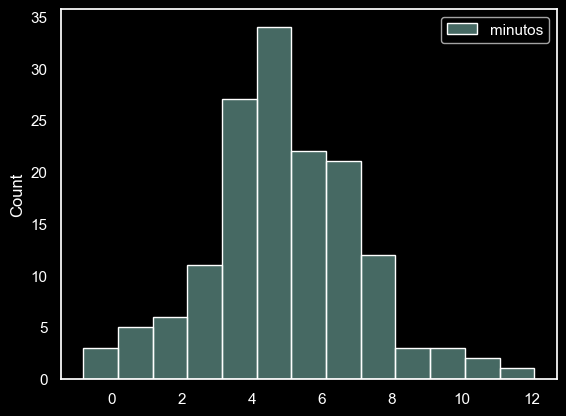

In [10]:
sns.histplot(df_linea_montaje)

In [11]:
# instanciamos la clase de los métodos estadísticos
ab_testing = sp.Pruebas_parametricas("metodo",  "minutos", df_linea_montaje)
ab_testing.test_anova()

Estadístico F: 4.275128289148849
Valor p: 0.015679251126397998
El p-valor de la prueba es 0.02, por lo tanto, hay diferencias significativas entre los grupos.


#### Ejercicio 2: Densidad de Fluidos 


La convección es un mecanismo fundamental de transferencia de calor en fluidos, que ocurre debido a las variaciones en la densidad provocadas por diferencias de temperatura. Este fenómeno se manifiesta cuando las porciones del fluido que se calientan, al volverse menos densas, ascienden hacia regiones de menor temperatura, mientras que las porciones más frías, al ser más densas, descienden hacia las zonas donde la temperatura es más alta. Este movimiento continuo da lugar a las llamadas corrientes de convección, las cuales desempeñan un papel crucial en la distribución homogénea de la temperatura dentro del fluido, promoviendo un equilibrio térmico.

En este contexto, se ha diseñado y ejecutado un experimento con el propósito de investigar cómo se ve afectada la densidad de un fluido cuando se incrementa la temperatura en una región específica del sistema; por tanto se asegura la independencia y aleatoriedad del mismo. El objetivo del experimento es comprender en detalle las modificaciones en la densidad que resultan de este aumento térmico y cómo estas afectan el comportamiento global del fluido.


1. Analiza las suposiciones del modelo: ¿Se cumplen las condiciones de homocedasticidad, independencia y normalidad?
2. ¿Tiene la temperatura un impacto notable en la densidad del fluido?
3. ¿Es posible concluir que las temperaturas de 100 y 125 provocan, en promedio, una menor densidad en el fluido comparadas con las temperaturas de 150 y 175?

In [12]:
df_densidad_fluidos = pd.read_csv("../data/densidad_fluidos.csv")

In [13]:
df_densidad_fluidos.head()

,temperatura,densidad
0,100,21.790655
1,100,21.725900
2,100,21.806052
3,100,21.895319
4,100,21.716121


In [14]:
df_densidad_fluidos.shape[0]

400

In [15]:
df_densidad_fluidos["temperatura"] = df_densidad_fluidos["temperatura"].astype(object)

In [16]:
df_densidad_fluidos.dtypes

temperatura     object
densidad       float64
dtype: object

In [17]:
sp.exploracion_dataframe(df_densidad_fluidos,"temperatura")

El número de datos es 400 y el de columnas es 2

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
temperatura,object
densidad,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna TEMPERATURA tiene las siguientes valore únicos:


,count
temperatura,
100,100
125,100
150,100
175,100



 ..................... 

Los principales estadísticos de las columnas categóricas para el 100 son: 


,count,unique,top,freq
temperatura,100,1,100,100



 ..................... 

Los principales estadísticos de las columnas numéricas para el 100 son: 


,count,mean,std,min,25%,50%,75%,max
densidad,100.0,21.72941,0.092615,21.472837,21.678719,21.727053,21.781399,21.928896



 ..................... 

Los principales estadísticos de las columnas categóricas para el 125 son: 


,count,unique,top,freq
temperatura,100,1,125,100



 ..................... 

Los principales estadísticos de las columnas numéricas para el 125 son: 


,count,mean,std,min,25%,50%,75%,max
densidad,100.0,21.532402,0.102713,21.323342,21.443228,21.539059,21.587963,21.822971



 ..................... 

Los principales estadísticos de las columnas categóricas para el 150 son: 


,count,unique,top,freq
temperatura,100,1,150,100



 ..................... 

Los principales estadísticos de las columnas numéricas para el 150 son: 


,count,mean,std,min,25%,50%,75%,max
densidad,100.0,21.766618,0.110576,21.429454,21.693158,21.769963,21.831839,22.152903



 ..................... 

Los principales estadísticos de las columnas categóricas para el 175 son: 


,count,unique,top,freq
temperatura,100,1,175,100



 ..................... 

Los principales estadísticos de las columnas numéricas para el 175 son: 


,count,mean,std,min,25%,50%,75%,max
densidad,100.0,21.903682,0.11322,21.618009,21.817386,21.896423,21.977595,22.170432


,mean,std
temperatura,,
100,21.7294,0.0926
125,21.5324,0.1027
150,21.7666,0.1106
175,21.9037,0.1132


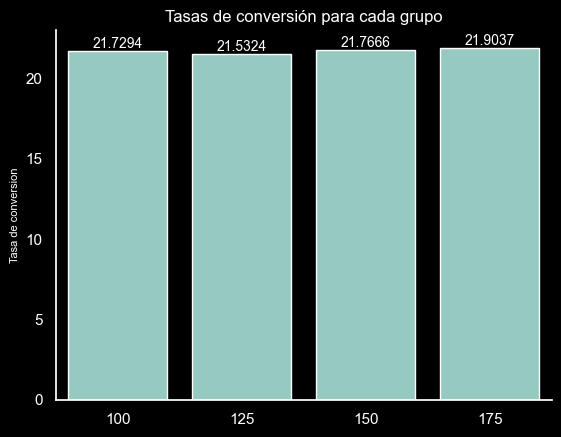

In [18]:
ratio_conversion = df_densidad_fluidos.groupby('temperatura')['densidad'].agg(["mean", "std"]).round(4)
display(ratio_conversion)

fig = sns.barplot(ratio_conversion, 
                  x = ratio_conversion.index, 
                  y = "mean") 

# ponemos las etiquetas en cada una de las barras
fig.bar_label(fig.containers[0], fontsize=10)


# eliminar los ejes de arriba y la derecha
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)

# ponemos título a la gráfica
fig.set_title("Tasas de conversión para cada grupo")

# cambiamos el nombre del eje y
fig.set_ylabel("Tasa de conversion", fontsize = 8)

# quitamos el nombre del eje x
fig.set_xlabel("");

<Axes: xlabel='densidad', ylabel='Count'>

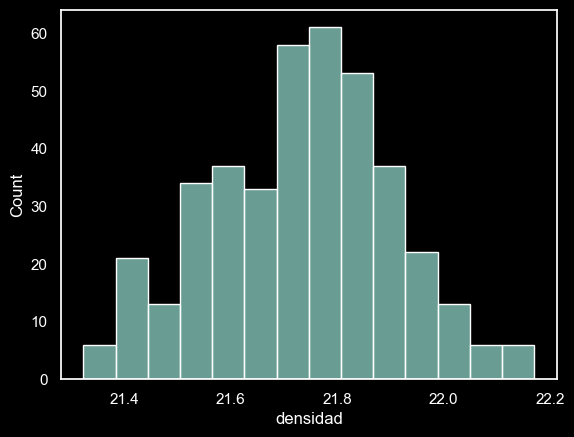

In [21]:
sns.histplot(df_densidad_fluidos["densidad"])

In [20]:
ab_testing = sp.Asunciones(df_densidad_fluidos, "densidad")
ab_testing.identificar_normalidad_analitica('shapiro')
ab_testing.identificar_normalidad_analitica('kolmogorov')

Para la columna densidad, los datos siguen una distribución normal según el test de Shapiro-Wilk.
Para la columna densidad, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.


In [22]:
# instanciamos la clase de los métodos estadísticos
ab_testing = sp.Pruebas_parametricas("temperatura",  "densidad", df_densidad_fluidos)
ab_testing.test_anova()

Estadístico F: 212.84277610615817
Valor p: 3.327798065119595e-82
El p-valor de la prueba es 0.0, por lo tanto, hay diferencias significativas entre los grupos.
